In [1]:
import ikpy
from ikpy.chain import Chain
from ikpy.urdf.URDF import get_chain_from_joints
from ikpy.urdf.utils import get_urdf_tree
from ikpy.utils import plot
import numpy as np

In [2]:
import sys
sys.path

['/home/brad/Dropbox/Boulder/Code/cairo_simulator/src',
 '/home/brad/Dropbox/Boulder/Code/cairo_motion_planning',
 '',
 '/home/brad/catkin_ws/devel/lib/python2.7/dist-packages',
 '/opt/ros/melodic/lib/python2.7/dist-packages',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/home/brad/.local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/brad/.local/lib/python3.7/site-packages/IPython/extensions',
 '/home/brad/.ipython']

In [3]:
urdf_file = "../assets/sawyer_description/urdf/sawyer_static.urdf"
# urdf_tree = get_urdf_tree(urdf_file, out_image_path="./sawyer")
base_elements = get_chain_from_joints(urdf_file, joints=['right_j0', 'right_j1', 'right_j2', 'right_j3', 'right_j4', 'right_j5', 'right_j6'])
print(base_elements)

['right_arm_base_link', 'right_j0', 'right_l0', 'right_j1', 'right_l1', 'right_j2', 'right_l2', 'right_j3', 'right_l3', 'right_j4', 'right_l4', 'right_j5', 'right_l5', 'right_j6']


In [4]:
chain = Chain.from_urdf_file(urdf_file, base_elements=base_elements, active_links_mask=[False] + 7 * [True] + 7 * [False])


In [5]:
chain.links

[Link name=Base link bounds=(None, None),
 Link name=right_j0 bounds=(-3.0503, 3.0503),
 Link name=right_j1 bounds=(-3.8183, 2.2824),
 Link name=right_j2 bounds=(-3.0514, 3.0514),
 Link name=right_j3 bounds=(-3.0514, 3.0514),
 Link name=right_j4 bounds=(-2.9842, 2.9842),
 Link name=right_j5 bounds=(-2.9842, 2.9842),
 Link name=right_j6 bounds=(-4.7104, 4.7104),
 Link name=right_hand bounds=(None, None),
 Link name=right_gripper_base_joint bounds=(None, None),
 Link name=right_connector_plate_base_joint bounds=(None, None),
 Link name=right_connector_plate_mount_joint bounds=(None, None),
 Link name=right_electric_gripper_base_joint bounds=(None, None),
 Link name=right_gripper_l_finger_joint bounds=(0.0, 0.020833),
 Link name=right_gripper_l_finger_tip_joint bounds=(None, None)]

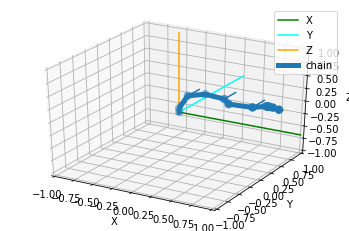

In [6]:
from mpl_toolkits.mplot3d import Axes3D;
fig, ax = plot.init_3d_figure();
chain.plot([0] * (len(chain)), ax)
ax.legend()


In [12]:
ik_results = chain.inverse_kinematics(target_position=[0.9,0,1.5], target_orientation=[0,0,0,1], max_iter=200)
print(ik_results)


[ 0.         -0.75209293 -1.10686645 -3.0514     -0.00945556  2.9842
 -0.04744073  1.93357243  0.          0.          0.          0.
  0.          0.          0.        ]


In [13]:
fk_results = chain.forward_kinematics(joints=ik_results)
print(fk_results)
print(fk_results[:3, 3]) 
print(fk_results[3, :4])

[[ 7.42537747e-01  5.96570328e-01  3.04534955e-01  7.51983401e-01]
 [-5.29141071e-01  8.01223933e-01 -2.79374188e-01 -1.42721613e-06]
 [-4.10667045e-01  4.63039283e-02  9.10608876e-01  1.27808829e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[ 7.51983401e-01 -1.42721613e-06  1.27808829e+00]
[0. 0. 0. 1.]
